<a href="https://colab.research.google.com/github/KevinBarranco24/Practica2_RW2/blob/main/Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 2
##Random Walks II

###Kevin Kristop Morales Barranco - 214603492



##MODULES

In [34]:
import math
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from scipy.stats import exponweib

import pandas as pd
from scipy.stats import levy_stable

#**Actividad 1: Lévy distribution - N Curvas (3 pts)**
 * Generar al menos las 4 curvas de distribución tipo Lévy stable que se observan en la imagen y graficarlas en una sola figura con plotly.
 * Cada una de las curvas corresponde a un valor distinto de alpha.
 * Considere los siguientes parametros para las curvas a generar: m = 3.0, beta = 0.

In [35]:
#Init variables
miu = 3.0
Levy_exponent = [0.7, 0.5, 0.1, 0.6]
beta = 0
Levy_pdf = list()

aux_domain = np.linspace(miu-5, miu+5, 400)

for i in range(len(Levy_exponent)):
  Levy_pdf.append(np.array([levy_stable.pdf(j, alpha=Levy_exponent[i], beta=beta, loc=miu) for j in aux_domain]))

fig_levy_pdf = go.Figure()

for n in range(len(Levy_pdf)):
  fig_levy_pdf.add_trace(go.Scatter(
                                       x = aux_domain,
                                       y = Levy_pdf[n],
                                       marker = dict(size=2),
                                       line = dict(width=2),
                                       mode = 'lines',
                                       name = 'Levy_{}'.format(Levy_exponent[n]),
                                       showlegend = True))


In [36]:
fig_levy_pdf.update_layout(title_text='Lévy distribution - N Curvas',
                        autosize=False,
                        width = 900,
                        height = 600)

fig_levy_pdf.show()

#**Actividad 2: Lévy distribution - Histograma + Curva (4 pts)**
 * A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
 * Visualizar con matplotlib.

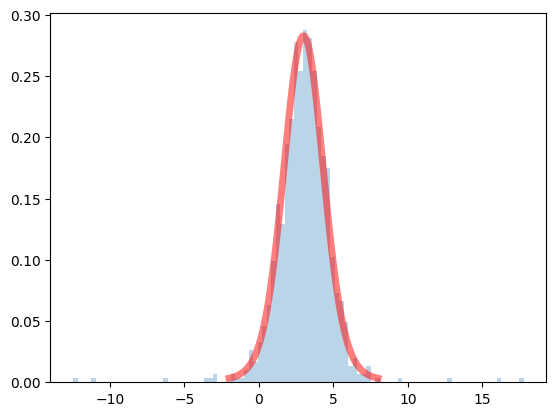

In [68]:
#init varaibles
miu = 3.0
Levy_exponent = 1.8
beta = 0

aux_domain = np.linspace(miu-5, miu+5, 100)

Levy_pdf = np.array([levy_stable.pdf(i, alpha=Levy_exponent, beta=beta, loc=miu) for i in aux_domain])
Levy_rvs = levy_stable.rvs(Levy_exponent, beta, loc=miu, size=1000)

plt.hist(Levy_rvs, bins=100, density=True, histtype='stepfilled', alpha=0.3, label='Levy walk histo')
plt.plot(aux_domain, Levy_pdf, 'r-', lw=5, alpha=0.5, label='Levy Walk PDF')

plt.show()

#**Actividad 3: Lévy flight - Vec2d - 1 Trayectoria (6 pts)**
 * Utilizar Vec2d.
 * Guardar trayectorias en pandas Data Frame.
 * Visualizar proyección en 3D con plotly.